Saved: YourName_3DScatter_MPG_Weight_HP.png
Saved: YourName_3DScatter_MPG_Acc_Year.png
Saved: YourName_3DSurface_MPG_Disp_HP.png
Saved: YourName_3DWireframe_MPG_Weight_Cyl.png
Saved: YourName_3DScatter_MPG_Origin_Year.png


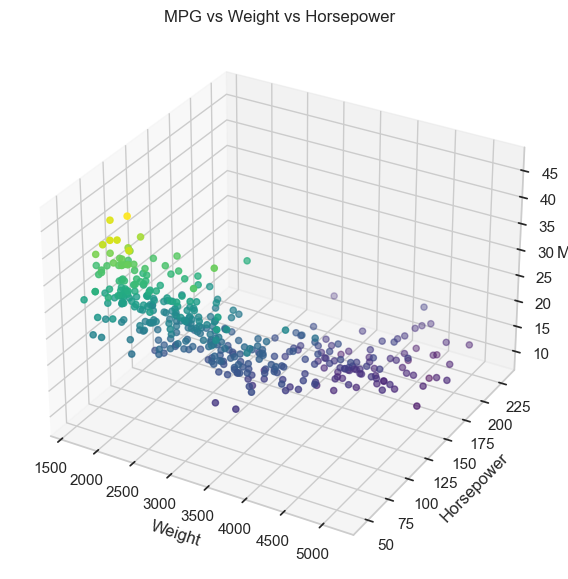

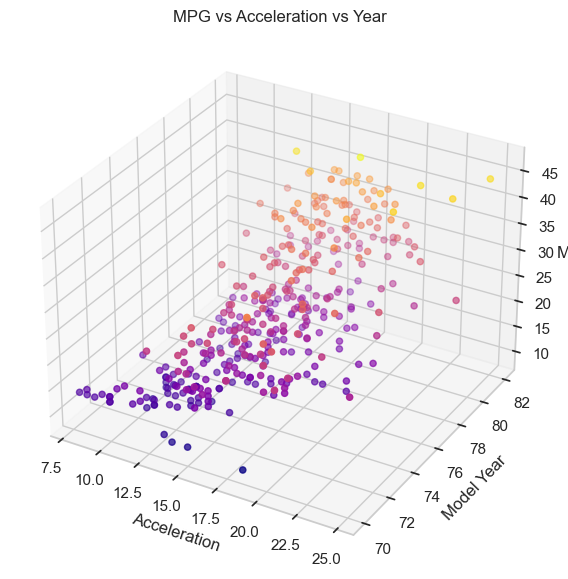

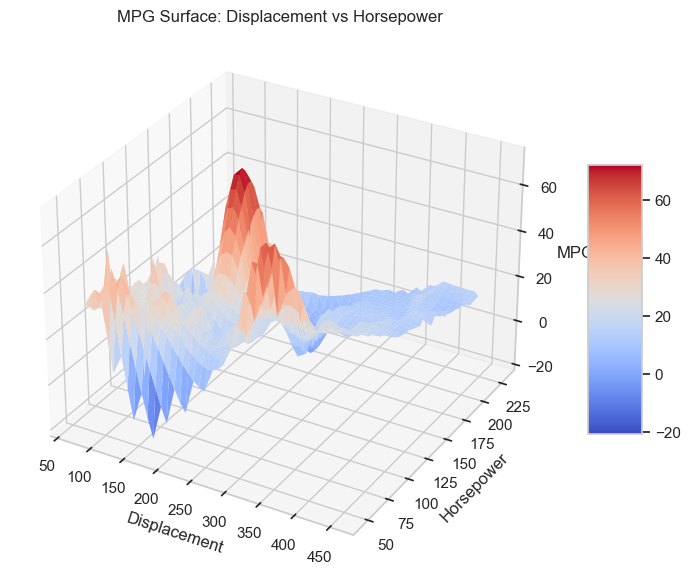

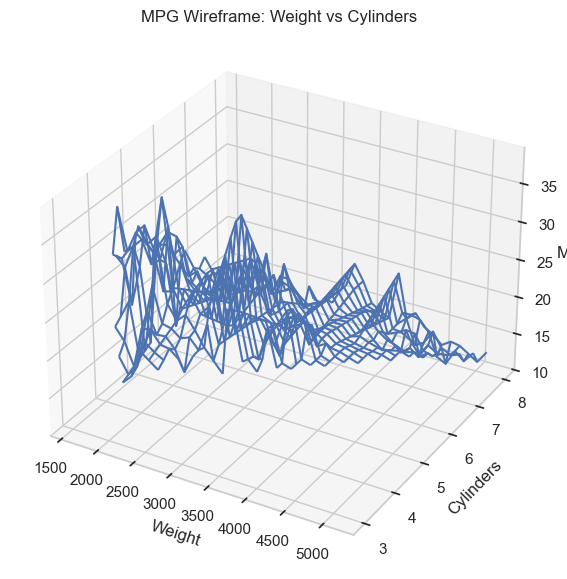

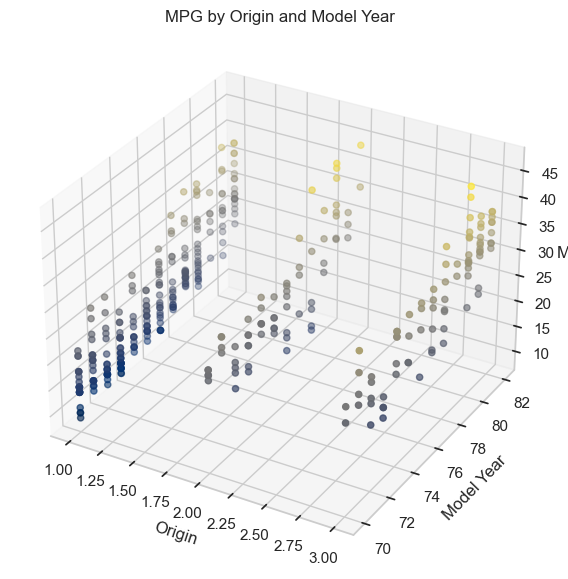

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from scipy.interpolate import griddata

# Set global style
sns.set(style="whitegrid")

# Load dataset and clean
column_names = ['mpg','cylinders','displacement','horsepower','weight',
                'acceleration','model_year','origin','car_name']

# Load the data and drop any rows with missing values
data = pd.read_csv('auto-mpg.data', names=column_names, sep=r'\s+') # Just fixed the reading separator 

data.dropna(inplace=True)

# Convert 'horsepower' to float (handle any non-numeric entries by converting them to NaN)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data.dropna(subset=['horsepower'], inplace=True)

# Function to save 3D plot with custom title
my_name = "YourName"
def save_plot(fig, title):
    filename = f"{my_name}_{title}.png"
    fig.savefig(filename)
    print(f"Saved: {filename}")

# 1. 3D Scatter: mpg vs weight vs horsepower
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['weight'], data['horsepower'], data['mpg'], c=data['mpg'], cmap='viridis')
ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('MPG')
ax.set_title('MPG vs Weight vs Horsepower')
save_plot(fig, '3DScatter_MPG_Weight_HP')

# 2. 3D Scatter: acceleration vs model year vs mpg
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['acceleration'], data['model_year'], data['mpg'], c=data['mpg'], cmap='plasma')
ax.set_xlabel('Acceleration')
ax.set_ylabel('Model Year')
ax.set_zlabel('MPG')
ax.set_title('MPG vs Acceleration vs Year')
save_plot(fig, '3DScatter_MPG_Acc_Year')

# 3. 3D Surface: displacement vs horsepower vs mpg (interpolated)
x = data['displacement']
y = data['horsepower']
z = data['mpg']
xi = np.linspace(x.min(), x.max(), 50)
yi = np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='cubic')

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xi, yi, zi, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Displacement')
ax.set_ylabel('Horsepower')
ax.set_zlabel('MPG')
ax.set_title('MPG Surface: Displacement vs Horsepower')
fig.colorbar(surf, shrink=0.5, aspect=5)
save_plot(fig, '3DSurface_MPG_Disp_HP')

# 4. 3D Wireframe: weight vs cylinders vs mpg
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
x = data['weight']
y = data['cylinders']
z = data['mpg']
xi = np.linspace(x.min(), x.max(), 30)
yi = np.linspace(y.min(), y.max(), 30)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), z, (xi, yi), method='linear')
ax.plot_wireframe(xi, yi, zi, rstride=1, cstride=1)
ax.set_xlabel('Weight')
ax.set_ylabel('Cylinders')
ax.set_zlabel('MPG')
ax.set_title('MPG Wireframe: Weight vs Cylinders')
save_plot(fig, '3DWireframe_MPG_Weight_Cyl')

# 5. 3D Scatter: origin vs model year vs mpg
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['origin'], data['model_year'], data['mpg'], c=data['mpg'], cmap='cividis')
ax.set_xlabel('Origin')
ax.set_ylabel('Model Year')
ax.set_zlabel('MPG')
ax.set_title('MPG by Origin and Model Year')
save_plot(fig, '3DScatter_MPG_Origin_Year')